In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

In [4]:
csv_path = '/home/vigneshk/datasets/Data Scientist Assignment-1/wine-dataset.csv'

In [5]:
csv_path

'/home/vigneshk/datasets/Data Scientist Assignment-1/wine-dataset.csv'

In [6]:
df = pd.read_csv(csv_path)

In [7]:
df.head()

production date  fixed acidity  volatile acidity  citric acid  \
0        1998/7/9            7.4              0.70         0.00   
1       1996-8-30            7.8              0.88         0.00   
2        2001/2/6            7.8              0.76         0.04   
3       1998/4/22           11.2              0.28         0.56   
4        1999/2/4            7.4              0.70         0.00   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             1.9      0.076                 11.0                  34.0   
1             2.6      0.098                 25.0                  67.0   
2             2.3      0.092                 15.0                  54.0   
3             1.9      0.075                 17.0                  60.0   
4             1.9      0.076                 11.0                  34.0   

   density    pH  sulphates  alcohol  quality  
0   0.9978  3.51       0.56      9.4        5  
1   0.9968  3.20       0.68      9.8        5  
2   0.9970  3.26       0.65      9.8        5  
3   0.9980  3.16       0.58      9.8        6  
4   0.9978  3.51       0.56      9.4        5

In [8]:
len(df)

1599

In [10]:
df.columns

Index([u'production date', u'fixed acidity', u'volatile acidity',
       u'citric acid', u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

In [25]:
#Finding the columns that have NULL values 
df.isnull().any() 

production date         False
fixed acidity           False
volatile acidity         True
citric acid             False
residual sugar          False
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                  True
pH                       True
sulphates               False
alcohol                  True
quality                 False
dtype: bool

In [28]:
#How many Nan Values in each column
df.isnull().sum()

production date         0
fixed acidity           0
volatile acidity        1
citric acid             0
residual sugar          0
chlorides               5
free sulfur dioxide     0
total sulfur dioxide    0
density                 1
pH                      1
sulphates               0
alcohol                 1
quality                 0
dtype: int64

In [50]:
df_na_rem.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527470     0.270976        2.538806   
std         1.741096          0.179544     0.194801        1.409928   
min         4.600000          0.000000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087231            15.874922             46.467792     0.996124   
std       0.047306            10.460157             32.895324     0.024998   
min       0.000000             1.000000              6.000000     0.000000   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.309168     0.658149    10.416417     5.636023  
std       0.175119     0.169507     1.097080     0.807569  
min       0.000000     0.330000     0.000000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [37]:
#Finding rows where the data is Nan
vol_ac = df['volatile acidity']
np.where(np.isnan(vol_ac))
df.iloc[17,] # Priting values of Nan Index 

production date         2002/5/9
fixed acidity                8.1
volatile acidity             NaN
citric acid                 0.28
residual sugar               1.7
chlorides                  0.368
free sulfur dioxide           16
total sulfur dioxide          56
density                   0.9968
pH                           NaN
sulphates                   1.28
alcohol                      9.3
quality                        5
Name: 17, dtype: object

In [32]:
#Replace NULL values with zero
df_na_rem = df.fillna(0)

In [51]:
type(df_na_rem['production date'])

pandas.core.series.Series

In [52]:
df_na_rem['production date']=pd.to_datetime(df_na_rem['production date'],infer_datetime_format=True)

In [53]:
type(df_na_rem['production date'])

pandas.core.series.Series

In [54]:
(df_na_rem['production date'])

0      1998-07-09
1      1996-08-30
2      2001-02-06
3      1998-04-22
4      1999-02-04
5      1998-02-09
6      1997-07-31
7      2002-06-25
8      2002-09-14
9      1997-09-21
10     2001-10-12
11     1996-04-15
12     1995-11-03
13     1998-01-07
14     2003-10-09
15     1996-10-13
16     1996-03-12
17     2002-05-09
18     1997-01-01
19     1996-06-27
20     1998-02-02
21     2002-03-17
22     2002-07-25
23     2001-01-16
24     2000-03-03
25     2001-08-26
26     1999-05-21
27     2003-05-12
28     1997-03-10
29     1996-07-22
          ...    
1569   1996-03-28
1570   1997-01-11
1571   1997-03-12
1572   1996-02-23
1573   2002-08-28
1574   1996-12-28
1575   2002-04-05
1576   2002-08-26
1577   1997-09-23
1578   2001-02-22
1579   2001-09-01
1580   2002-01-29
1581   2001-03-16
1582   1995-12-03
1583   2001-07-28
1584   1998-10-07
1585   2002-05-16
1586   1998-12-23
1587   2002-05-06
1588   1997-01-18
1589   2001-03-27
1590   1995-12-11
1591   2002-06-09
1592   1999-01-16
1593   199

In [59]:
from datetime import datetime
d1=datetime(2018,1,1)

In [64]:
deltas=[]
for i in range(len(df_na_rem)):
    delta=d1-df_na_rem['production date'][i]
    deltas.append(delta.days)

In [66]:
df_na_rem['No_of_days']=deltas

In [70]:
del df_na_rem['No_of_days']

In [71]:
df_na_rem['no_of_days']=deltas

In [72]:
df_na_rem.head()

production date  fixed acidity  volatile acidity  citric acid  \
0      1998-07-09            7.4              0.70         0.00   
1      1996-08-30            7.8              0.88         0.00   
2      2001-02-06            7.8              0.76         0.04   
3      1998-04-22           11.2              0.28         0.56   
4      1999-02-04            7.4              0.70         0.00   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             1.9      0.076                 11.0                  34.0   
1             2.6      0.098                 25.0                  67.0   
2             2.3      0.092                 15.0                  54.0   
3             1.9      0.075                 17.0                  60.0   
4             1.9      0.076                 11.0                  34.0   

   density    pH  sulphates  alcohol  quality  no_of_days  
0   0.9978  3.51       0.56      9.4        5        7116  
1   0.9968  3.20       0.68      9.8        5        7794  
2   0.9970  3.26       0.65      9.8        5        6173  
3   0.9980  3.16       0.58      9.8        6        7194  
4   0.9978  3.51       0.56      9.4        5        6906

In [78]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
Y_wine=df_na_rem['quality']
X_wine=df_na_rem.drop(['quality','production date'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_wine, Y_wine,
     test_size=0.30, random_state=123)

In [79]:
X_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
374            14.0             0.410         0.63             3.8      0.089   
800             7.2             0.610         0.08             4.0      0.082   
1441            7.4             0.785         0.19             5.2      0.094   
1269            5.5             0.490         0.03             1.8      0.044   
691             9.2             0.920         0.24             2.6      0.087   
1101            7.4             0.490         0.27             2.1      0.071   
1431            7.6             0.430         0.31             2.1      0.069   
543            11.2             0.660         0.24             2.5      0.085   
517            10.4             0.610         0.49             2.1      0.200   
134             7.9             1.040         0.05             2.2      0.084   
1511            7.1             0.690         0.04             2.1      0.068   
19              7.9             0.320         0.51             1.8      0.341   
810             7.3             0.490         0.10             2.6      0.068   
72              7.7             0.690         0.22             1.9      0.084   
306             7.6             0.620         0.32             2.2      0.082   
706             7.0             0.780         0.08             2.0      0.093   
184             6.7             0.620         0.21             1.9      0.079   
1033            7.5             0.570         0.08             2.6      0.089   
303             7.4             0.670         0.12             1.6      0.186   
403            11.4             0.600         0.49             2.7      0.085   
929             8.7             0.330         0.38             3.3      0.063   
1055            8.2             0.640         0.27             2.0      0.095   
868             6.8             0.560         0.22             1.8      0.074   
209            11.0             0.300         0.58             2.1      0.054   
809             7.6             0.480         0.31             2.8      0.070   
1555            7.0             0.560         0.17             1.7      0.065   
468            11.4             0.360         0.69             2.1      0.090   
409            12.5             0.460         0.49             4.5      0.070   
1201            7.9             0.340         0.36             1.9      0.065   
861             5.8             1.010         0.66             2.0      0.039   
...             ...               ...          ...             ...        ...   
39              7.3             0.450         0.36             5.9      0.074   
340            12.2             0.340         0.50             2.4      0.066   
2               7.8             0.760         0.04             2.3      0.092   
451             8.4             0.370         0.53             1.8      0.413   
1092            7.0             0.540         0.09             2.0      0.081   
1232            7.6             0.430         0.29             2.1      0.075   
608            10.1             0.650         0.37             5.1      0.110   
420             9.5             0.560         0.33             2.4      0.089   
1277            7.0             0.690         0.00             1.9      0.114   
846             6.4             0.640         0.21             1.8      0.081   
1363            8.0             0.830         0.27             2.0      0.080   
1433            6.1             0.400         0.16             1.8      0.069   
111             8.4             0.620         0.09             2.2      0.084   
224             8.4             0.635         0.36             2.0      0.089   
942            10.1             0.430         0.40             2.6      0.092   
1568            7.0             0.560         0.13             1.6      0.077   
73              8.3             0.675         0.26             2.1      0.084   
47              8.7             0.290

In [94]:
std_scale = preprocessing.MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

In [95]:
X_train

array([[0.82727273, 0.25949367, 0.63      , ..., 0.28742515, 0.72483221,
        0.31051753],
       [0.20909091, 0.38607595, 0.08      , ..., 0.10778443, 0.63087248,
        0.5148581 ],
       [0.22727273, 0.49683544, 0.19      , ..., 0.11377246, 0.64205817,
        0.29682805],
       ...,
       [0.3       , 0.15189873, 0.34      , ..., 0.36526946, 0.73154362,
        0.72220367],
       [0.16363636, 0.30379747, 0.02      , ..., 0.11976048, 0.65100671,
        0.67612688],
       [0.15454545, 0.35443038, 0.14      , ..., 0.17365269, 0.7852349 ,
        0.15292154]])

In [96]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [97]:
y_predict=model.predict(X_test)

In [98]:
sum(y_predict==y_test)/float(len(y_test))

0.6145833333333334

In [128]:
from sklearn.feature_selection import RFE,RFECV
rfe = RFE(model, 5)
fit = rfe.fit(X_train, y_train)

In [129]:
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num Features: 5
Selected Features: [False  True False False False False  True  True False  True  True False]
Feature Ranking: [2 1 3 8 7 5 1 1 6 1 1 4]


In [92]:
X_wine.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'no_of_days'],
      dtype='object')

In [130]:
X_train2=fit.transform(X_train)
X_test2=fit.transform(X_test)
model2=RandomForestClassifier(random_state=0)
model2.fit(X_train2,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [131]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
ac2=accuracy_score(y_test,model2.predict(X_test2))
print('Accuracy is: ',ac2)
cm_2 = confusion_matrix(y_test,model2.predict(X_test2))
print(cm_2)

('Accuracy is: ', 0.6458333333333334)
[[  0   0   2   0   0   0]
 [  0   2  11   2   1   0]
 [  0   4 152  57   1   0]
 [  0   4  47 120  12   2]
 [  0   0   1  21  36   0]
 [  0   0   0   2   3   0]]


In [116]:
model4 = RandomForestClassifier() 
rfecv = RFECV(estimator=model4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', rfecv.support_)

('Optimal number of features :', 11)
('Best features :', array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True]))


Feature ranking:
1. feature 10 (0.136978)
2. feature 6 (0.114496)
3. feature 9 (0.110932)
4. feature 1 (0.092663)
5. feature 7 (0.091421)
6. feature 8 (0.073295)
7. feature 4 (0.068607)
8. feature 2 (0.067134)
9. feature 3 (0.064772)
10. feature 0 (0.063467)
11. feature 11 (0.062742)
12. feature 5 (0.053494)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

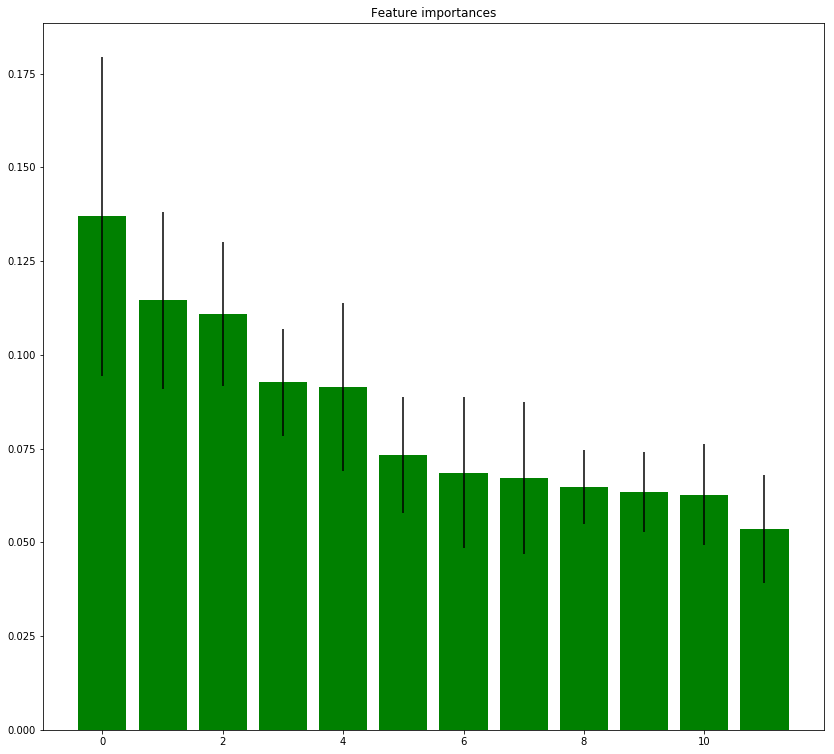

In [127]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [132]:
X_wine.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'no_of_days'],
      dtype='object')

In [138]:
X_wine2=df_na_rem.drop(['fixed acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','pH','no_of_days'],axis=1)
X_new=X_wine2.drop(['quality','production date'],axis=1)
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_new, Y_wine,
     test_size=0.30, random_state=123)
std_scale2 = preprocessing.MinMaxScaler(feature_range=(0,1)).fit(X_n_train)
X_n_train = std_scale2.transform(X_n_train)
X_n_test = std_scale2.transform(X_n_test)
model5=RandomForestClassifier()
model5.fit(X_n_train,y_n_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [139]:
ac2=accuracy_score(y_n_test,model5.predict(X_n_test))
print('Accuracy is: ',ac2)
cm_2 = confusion_matrix(y_n_test,model5.predict(X_n_test))
print(cm_2)

('Accuracy is: ', 0.6416666666666667)
[[  0   0   2   0   0   0]
 [  0   2   6   7   1   0]
 [  0   1 154  54   5   0]
 [  0   2  53 120  10   0]
 [  0   0   0  26  32   0]
 [  0   0   0   1   4   0]]


In [148]:
from sklearn import svm
clf = svm.SVC(C=1.0)
clf.fit(X_n_train, y_n_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [149]:
ac2=accuracy_score(y_n_test,clf.predict(X_n_test))
print('Accuracy is: ',ac2)
cm_2 = confusion_matrix(y_n_test,clf.predict(X_n_test))
print(cm_2)

('Accuracy is: ', 0.5770833333333333)
[[  0   0   2   0   0   0]
 [  0   0  11   5   0   0]
 [  0   0 148  66   0   0]
 [  0   0  56 129   0   0]
 [  0   0   3  55   0   0]
 [  0   0   0   5   0   0]]


In [152]:
#Defining the splits for categories. 1–4 will be poor quality, 5–6 will be average, 7–10 will be great
bins = [1,4,6,10]
#0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1,2]
df_na_rem['quality_categorical'] = pd.cut(df_na_rem['quality'], bins=bins, labels=quality_labels, include_lowest=True)
#Displays the first 2 columns
display(df_na_rem.head(n=2))
# Split the data into features and target label
quality_raw = df_na_rem['quality_categorical']
features_raw = df_na_rem.drop(['quality', 'quality_categorical','production date'], axis = 1)

production date  fixed acidity  volatile acidity  citric acid  \
0      1998-07-09            7.4              0.70          0.0   
1      1996-08-30            7.8              0.88          0.0   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             1.9      0.076                 11.0                  34.0   
1             2.6      0.098                 25.0                  67.0   

   density    pH  sulphates  alcohol  quality  no_of_days quality_categorical  
0   0.9978  3.51       0.56      9.4        5        7116                   1  
1   0.9968  3.20       0.68      9.8        5        7794                   1

In [153]:
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(features_raw, quality_raw,
     test_size=0.30, random_state=123)

In [156]:
b_model=RandomForestClassifier()
b_model.fit(X_b_train,y_b_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [157]:
ac2=accuracy_score(y_b_test,b_model.predict(X_b_test))
print('Accuracy is: ',ac2)
cm_2 = confusion_matrix(y_b_test,b_model.predict(X_b_test))
print(cm_2)

('Accuracy is: ', 0.8708333333333333)
[[  0  18   0]
 [  2 389   8]
 [  0  34  29]]


In [175]:
rfe = RFE(b_model,6)
fit = rfe.fit(X_b_train, y_b_train)

In [164]:
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num Features: 11
Selected Features: [ True  True  True  True  True False  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 2 1 1 1 1 1 1]


In [176]:
X_b_train2=fit.transform(X_b_train)
X_b_test2=fit.transform(X_b_test)
b_model2=RandomForestClassifier(random_state=0)
b_model2.fit(X_b_train2,y_b_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [177]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
ac2=accuracy_score(y_b_test,b_model2.predict(X_b_test2))
print('Accuracy is: ',ac2)
cm_2 = confusion_matrix(y_b_test,b_model2.predict(X_b_test2))
print(cm_2)

('Accuracy is: ', 0.875)
[[  2  16   0]
 [  3 385  11]
 [  0  30  33]]
